**Project Goals**

I will be using the Penn World Tables Data Sets with information on relative levels of income, output, input and productivity, covering 185 countries between 1950 and 2023. I aim to better understand which countries have experienced economic growth and what properties these countries may share as opposed to those who have not enjoyed the same growth. To gain greater insight into some of the characteristics of these countries I will also be incorporating the International Database provided by the U.S. Census Bureau. The website in which the analysis is located can be found [here](https://thomasswide.github.io).


**Collaboration Plan**

As a graduate student I will be working alone, but plan on leveraging all resources made available to me both on campus and off to ensure that I am staying on track, getting the advice and assistance I need, and achieving the goal of this project.


**Project Dataset**

The main dataset I’m planning to use is the Penn World Tables data set available [here](https://www.rug.nl/ggdc/productivity/pwt/?lang=en). The Penn World Tables (PWT) is a globally recognized dataset that provides consistent, comparable measures of economic performance for over 180 countries from 1950 onward, making it one of the most valuable tools for understanding patterns of economic growth and development. By standardizing national accounts and adjusting for purchasing power, the PWT allows researchers to meaningfully compare GDP, capital, labor, productivity, and price levels across nations and over time. This will enable analyses of which countries have experienced sustained economic growth and which have not, as well as investigations into the factors driving these differences—such as investment rates, human capital accumulation, and technological progress. Because the dataset supports growth accounting, cross-country comparisons, and convergence studies, it helps identify structural and policy-related patterns shared by high-growth economies, such as rising productivity and stable investment, versus low-growth economies exhibiting a lack of these same characteristics. I will also be using the International Database found [here](https://www.census.gov/programs-surveys/international-programs/about/idb.html). The International Database will allow me to incorporate additional demographic information that can be used to better understand similarities and differences between high and low growth countries.


**ETL (Extraction, Transform, and Load)**

I have loaded the PWT. The PWT shows a wide range of macroeconomic variables, including real GDP (expenditure-side and output-side), GDP at national prices, population, employment, average hours worked, human capital, capital stock, labor share of income, consumption, investment, government expenditure, exports, imports, price levels, and total factor productivity, allowing detailed analysis of economic output, inputs, and efficiency across countries and time. The International Database will provide demographic estimates and projections for over 200 countries, tracking variables such as population by age and sex, fertility, mortality, migration, and overall population change to support analysis of global population trends and dynamics.



In [24]:
import pandas as pd

In [25]:
from google.colab import files
uploaded = files.upload()

Saving pwt110.xlsx to pwt110 (3).xlsx


In [26]:
df_pwt = pd.read_excel("pwt110.xlsx", sheet_name='Data')
print(df_pwt.head())

  countrycode country   currency_unit  year  rgdpe  rgdpo  pop  emp  avh  hc  \
0         ABW   Aruba  Aruban Guilder  1950    NaN    NaN  NaN  NaN  NaN NaN   
1         ABW   Aruba  Aruban Guilder  1951    NaN    NaN  NaN  NaN  NaN NaN   
2         ABW   Aruba  Aruban Guilder  1952    NaN    NaN  NaN  NaN  NaN NaN   
3         ABW   Aruba  Aruban Guilder  1953    NaN    NaN  NaN  NaN  NaN NaN   
4         ABW   Aruba  Aruban Guilder  1954    NaN    NaN  NaN  NaN  NaN NaN   

   ...  csh_x  csh_m  csh_r  pl_c  pl_i  pl_g  pl_x  pl_m  pl_n  pl_k  
0  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 51 columns]


I'm going to pull the Top 10 and Bottom 10 in average annual RGDPE Change since 1970, to begin investigating these high and low growth groups. I'll also look at some other groups that may have correlations and take some initial looks at what growth looks like across the board.

Filter for 1970 onward.

In [27]:
df_pwt = df_pwt[df_pwt['year'] >= 1970]

Sort the dataframe by country and year and then calculate the year-over-year percentage change in rgdpe for each country and store it in a new column.



In [28]:
df_pwt = df_pwt.sort_values(by=['country', 'year'])
df_pwt['rgdpe_yoy_growth'] = df_pwt.groupby('country')['rgdpe'].pct_change() * 100

/tmp/ipython-input-217836251.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pwt['rgdpe_yoy_growth'] = df_pwt.groupby('country')['rgdpe'].pct_change() * 100


Group the DataFrame by by country to calculate the average growth for each country.



In [29]:
grouped_by_country = df_pwt.groupby('country')

Calculate the mean of the 'rgdpe_yoy_growth' column for each country and store it in a new variable named `average_growth_by_country`.



In [30]:
average_growth_by_country = grouped_by_country['rgdpe_yoy_growth'].mean()
display(average_growth_by_country.head())

,rgdpe_yoy_growth
country,
Albania,3.940048
Algeria,4.124344
Angola,4.617744
Anguilla,4.536348
Antigua and Barbuda,4.084702


Sort the average growth rates to identify the top and bottom 10 countries.



In [31]:
bottom_10_countries = average_growth_by_country.sort_values(ascending=True).head(10)
top_10_countries = average_growth_by_country.sort_values(ascending=False).head(10)
print("Bottom 10 countries by average annual rgdpe growth:")
display(bottom_10_countries)
print("\nTop 10 countries by average annual rgdpe growth:")
display(top_10_countries)

Bottom 10 countries by average annual rgdpe growth:


,rgdpe_yoy_growth
country,
Venezuela (Bolivarian Republic of),-3.318156
Ukraine,0.066954
Curaçao,0.169962
Montserrat,0.411303
Barbados,0.891045
Republic of Moldova,0.917387
Serbia,0.981019
Tajikistan,1.133938
Kyrgyzstan,1.308903



Top 10 countries by average annual rgdpe growth:


,rgdpe_yoy_growth
country,
Equatorial Guinea,11.219359
Botswana,8.689006
Qatar,8.170721
Maldives,8.144757
"China, Macao SAR",8.036826
Turks and Caicos Islands,7.942441
China,7.910034
Singapore,7.718076
Mongolia,7.292104


Show a comparison of growth rates among prominent countries, i.e. US, UK, Germany, France, Brazil, Russia, India, China, South Africa

In [32]:
prominent_countries = ['United States', 'United Kingdom', 'Germany', 'France', 'Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
prominent_countries_growth = average_growth_by_country[average_growth_by_country.index.isin(prominent_countries)]
print("Average annual rgdpe growth for prominent countries:")
display(prominent_countries_growth.sort_values(ascending=False))

Average annual rgdpe growth for prominent countries:


,rgdpe_yoy_growth
country,
China,7.910034
India,5.241351
Brazil,4.576090
Russian Federation,2.862690
United States,2.849339
South Africa,2.655536
United Kingdom,2.484046
Germany,2.477173
France,2.450665


Comparison of NAFTA Countries

In [33]:
nafta_countries = ['Canada', 'Mexico', 'United States']
nafta_countries_growth = average_growth_by_country[average_growth_by_country.index.isin(nafta_countries)]
print("Average annual rgdpe growth for NAFTA countries:")
display(nafta_countries_growth.sort_values(ascending=False))

Average annual rgdpe growth for NAFTA countries:


,rgdpe_yoy_growth
country,
Mexico,3.229939
Canada,2.909577
United States,2.849339


Comparison of African Countries

In [34]:
african_countries = (
    "Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cabo Verde, "
    "Cameroon, Central African Republic, Chad, Comoros, Congo, Democratic Republic of the Congo, "
    "Djibouti, Egypt, Equatorial Guinea, Eritrea, Eswatini, Ethiopia, Gabon, "
    "Gambia, Ghana, Guinea, Guinea-Bissau, Kenya, Lesotho, Liberia, Libya, "
    "Madagascar, Malawi, Mali, Mauritania, Mauritius, Morocco, Mozambique, "
    "Namibia, Niger, Nigeria, Rwanda, Sao Tome and Principe, Senegal, Seychelles, "
    "Sierra Leone, Somalia, South Africa, South Sudan, Sudan, Tanzania, Togo, "
    "Tunisia, Uganda, Zambia, Zimbabwe"
)


In [35]:
african_countries_list = [country.strip() for country in african_countries.split(',')]
african_countries_growth = average_growth_by_country[average_growth_by_country.index.isin(african_countries_list)]
print("Average annual rgdpe growth for African countries:")
display(african_countries_growth.sort_values(ascending=False))

Average annual rgdpe growth for African countries:


,rgdpe_yoy_growth
country,
Equatorial Guinea,11.219359
Botswana,8.689006
Egypt,6.906518
Congo,6.777389
Zimbabwe,6.393989
Ethiopia,6.067112
Gabon,5.639094
Mali,5.500718
Uganda,5.371488


Looking at a simple relationship between population and growth.


In [36]:
latest_pop_by_country = df_pwt.groupby('country')['pop'].last()
growth_and_pop = pd.concat([average_growth_by_country, latest_pop_by_country], axis=1)
growth_and_pop.columns = ['average_rgdpe_growth', 'latest_population']
display(growth_and_pop.head())

,average_rgdpe_growth,latest_population
country,,
Albania,3.940048,2.811655
Algeria,4.124344,46.164219
Angola,4.617744,36.749906
Anguilla,4.536348,0.014410
Antigua and Barbuda,4.084702,0.093316


Visualize the relationship between population and average annual growth rate, plotting all countries.



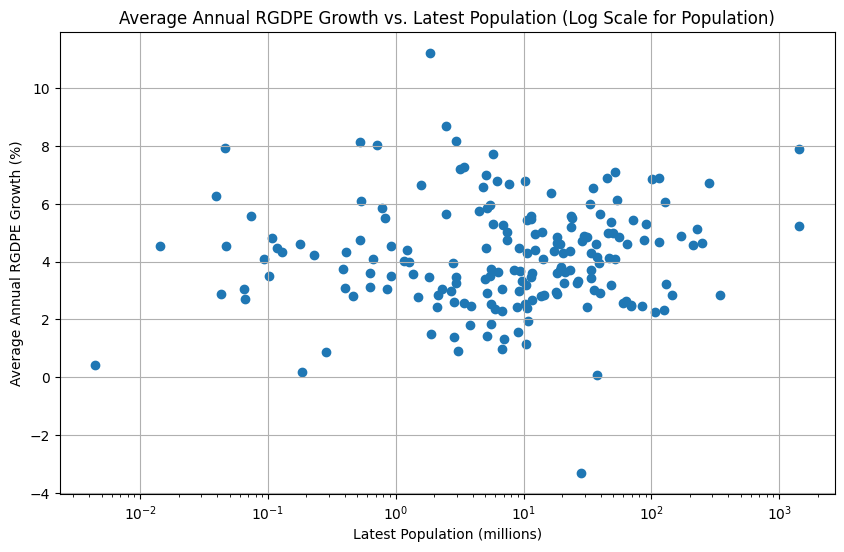

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(growth_and_pop['latest_population'], growth_and_pop['average_rgdpe_growth'])
plt.xlabel('Latest Population (millions)')
plt.xscale('log')
plt.ylabel('Average Annual RGDPE Growth (%)')
plt.title('Average Annual RGDPE Growth vs. Latest Population (Log Scale for Population)')
plt.grid(True)
plt.show()

**Closing Thoughts and Final Goals**

My goal is to use the Penn World Tables and the U.S. Census Bureau’s International Database together to understand what factors may be correlated with economic growth or its opposite across countries. The PWT provides detailed measures of economic performance—such as GDP, productivity, capital accumulation, and labor inputs—while the IDB offers demographic insights like population structure, fertility, mortality, and migration. By combining these datasets, I can examine how demographic characteristics relate to patterns of economic expansion or decline. Questions such as whether younger populations are linked to faster growth, whether migration influences productivity, or whether aging societies experience slower GDP gains should serve to guide my analysis. Ultimately, the goal is to identify meaningful relationships between demographic and economic variables and to develop a clearer picture of the structural and social factors that may help explain why some countries thrive economically while others struggle to grow.
